Outliers found: 16292


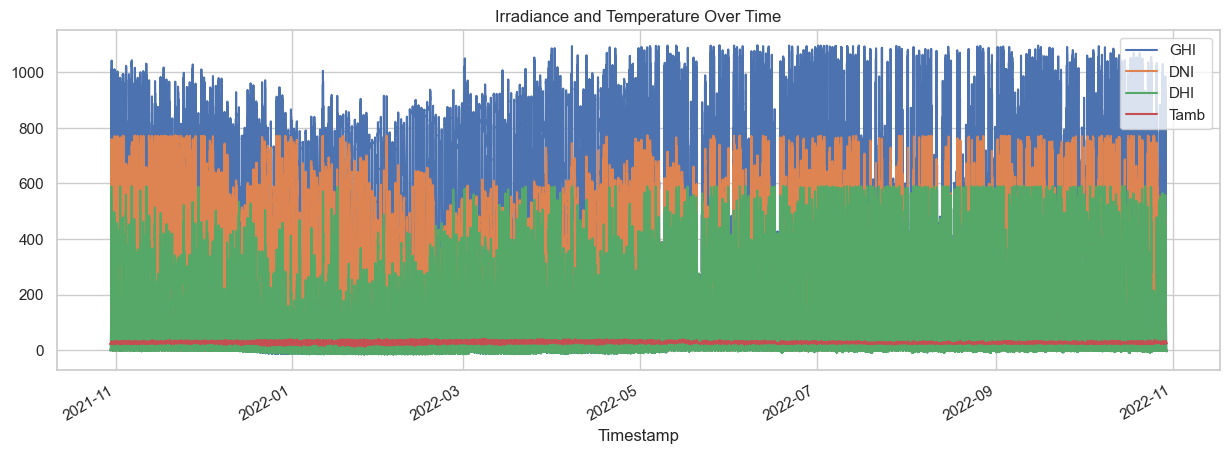

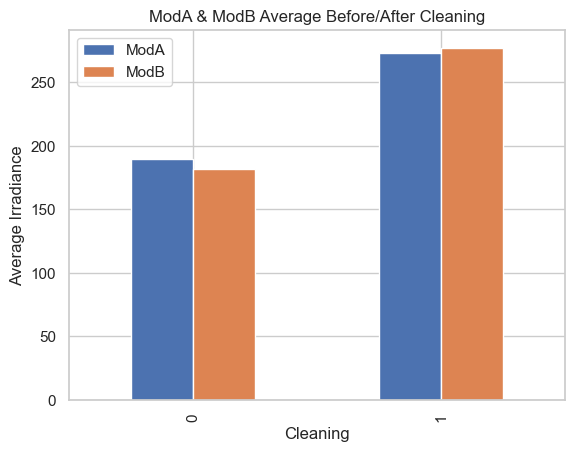

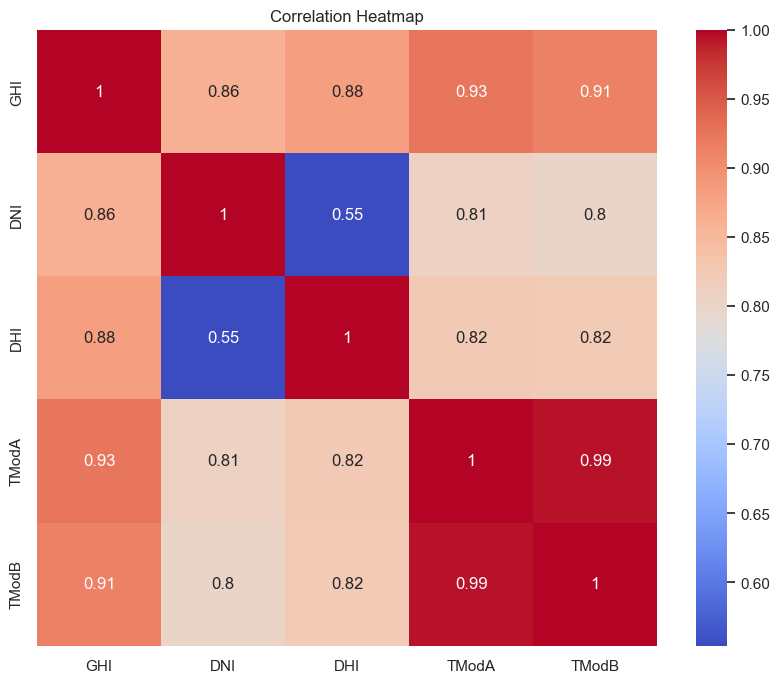

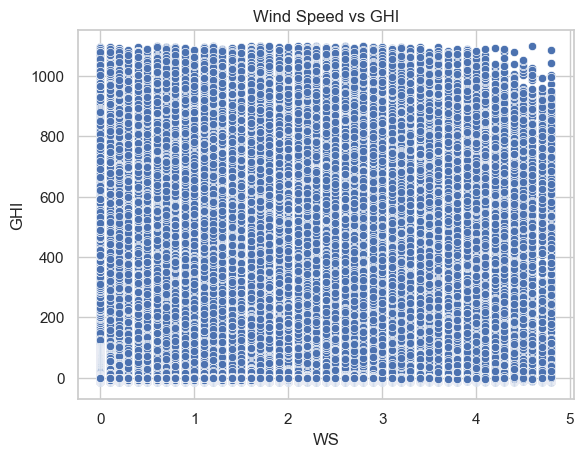

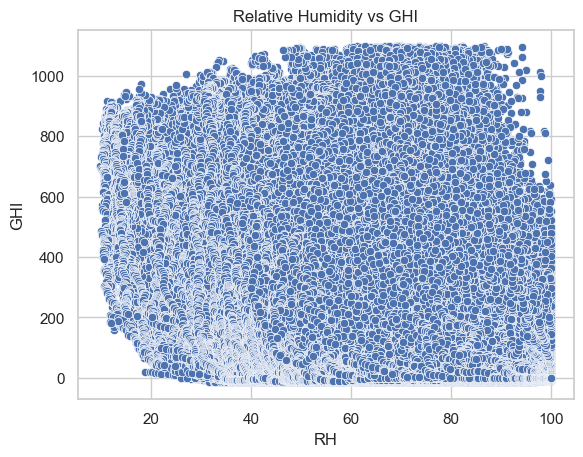

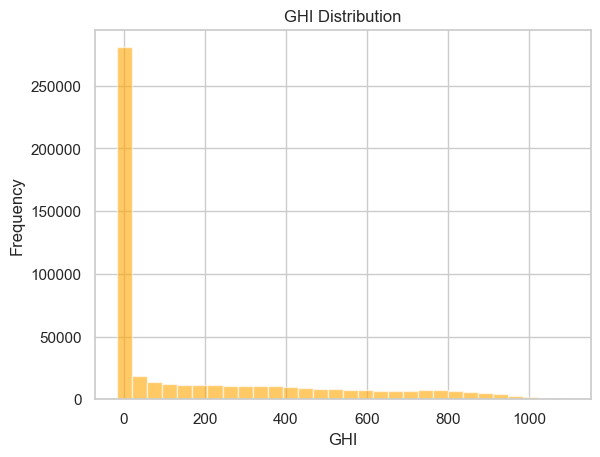

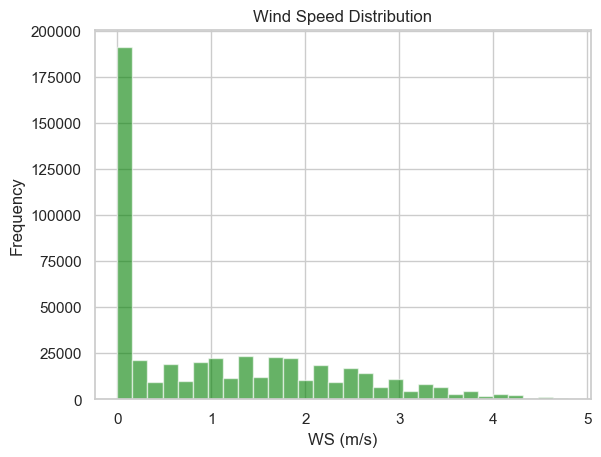

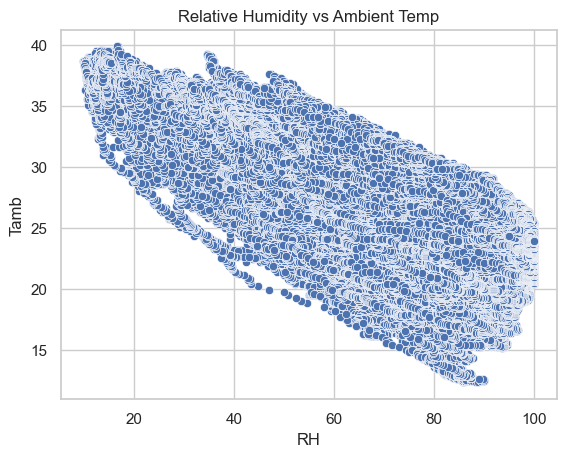

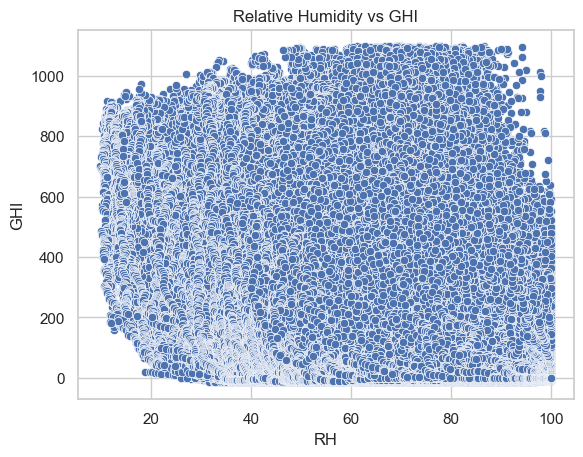

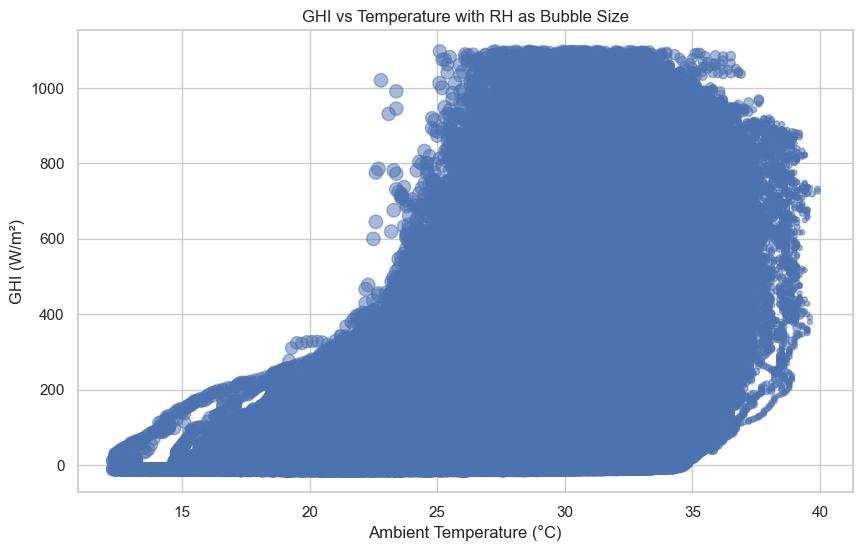

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("../data/sierraleone-bumbuna.csv")  
df.head()

# Summary stats
df.describe()

# Missing values
missing = df.isna().sum()
missing[missing > 0]

# Columns with >5% nulls
total_rows = len(df)
high_null_cols = missing[missing > 0.05 * total_rows]
high_null_cols

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols_to_check].apply(zscore)

# Flag rows with any |Z| > 3
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"Outliers found: {outliers.sum()}")

# Drop outliers
df_clean = df[~outliers].copy()

# Fill missing values with median
for col in cols_to_check:
    if df_clean[col].isna().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

df_clean.to_csv("../data/sierraleone-bumbuna_clean.csv", index=False)

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plotting GHI, DNI, DHI, Tamb
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 5), title="Irradiance and Temperature Over Time")
plt.show()

# Group by Cleaning
df_clean['Cleaning'] = df_clean['Cleaning'].fillna(0)
cleaning_group = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

cleaning_group.plot(kind='bar', title="ModA & ModB Average Before/After Cleaning")
plt.ylabel("Average Irradiance")
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter Plots
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title("Relative Humidity vs GHI")
plt.show()

# Histogram
df_clean['GHI'].hist(bins=30, alpha=0.6, color='orange')
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

df_clean['WS'].hist(bins=30, alpha=0.6, color='green')
plt.title("Wind Speed Distribution")
plt.xlabel("WS (m/s)")
plt.ylabel("Frequency")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Ambient Temp")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title("Relative Humidity vs GHI")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature with RH as Bubble Size")
plt.grid(True)
plt.show()
